In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import math
from functions import *
sns.set_style('whitegrid')

In [2]:
benchmarks = ["^NSEI","^NSEMDCP50","^GSPC"]
start_date = '2022-01-01'
end_date = '2022-12-31'
INITIAL_AMT_INVESTED = 10000

In [3]:
benchmark_prices, temp = fetch_data(benchmarks, start_date=start_date, end_date=end_date)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.25it/s]


In [4]:
benchmark_prices

,^NSEI,^NSEMDCP50,^GSPC
Date,,,
2022-01-02 18:30:00+00:00,17625.699219,8523.851562,NaN
2022-01-03 05:00:00+00:00,NaN,NaN,4796.560059
2022-01-03 18:30:00+00:00,17805.250000,8558.700195,NaN
2022-01-04 05:00:00+00:00,NaN,NaN,4793.540039
2022-01-04 18:30:00+00:00,17925.250000,8570.349609,NaN
...,...,...,...
2022-12-28 05:00:00+00:00,NaN,NaN,3783.219971
2022-12-28 18:30:00+00:00,18191.000000,8697.042969,NaN
2022-12-29 05:00:00+00:00,NaN,NaN,3849.280029


In [6]:
benchmark_prices = benchmark_prices.bfill(axis=0)
benchmark_prices = benchmark_prices.ffill(axis=0)

<Axes: xlabel='Date'>

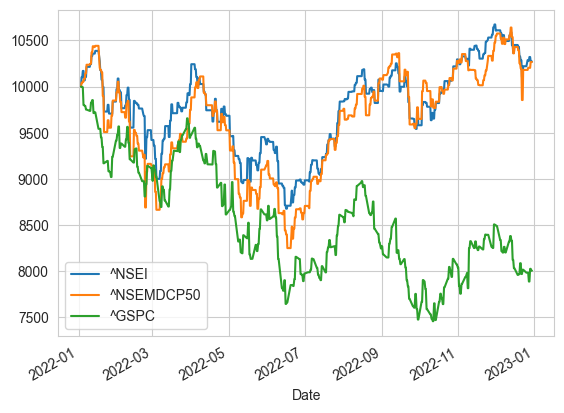

In [7]:
bm_shares = INITIAL_AMT_INVESTED/benchmark_prices.iloc[0,:]
bm_value = bm_shares*benchmark_prices
bm_value.plot()

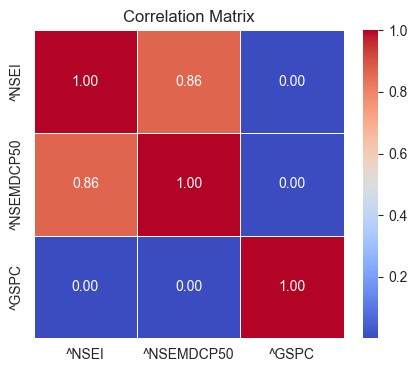

In [8]:
bm_log_returns = np.log(benchmark_prices/benchmark_prices.shift(1))
bm_correlation_matrix = bm_log_returns.corr()
plt.figure(figsize=(5,4))
sns.heatmap(bm_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()